# Room Cleanliness Classifier via Image Classification using Logistic Regression

Import Requirements

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2 
import os 
import pickle
import warnings
warnings.filterwarnings('ignore')

Setting Paths

In [2]:
train_messy_path = "../dataset/images/train/messy"
train_clean_path = "../dataset/images/train/clean"
val_messy_path = "../dataset/images/val/messy"
val_clean_path = "../dataset/images/val/clean"

Deciding Image size and Classes

In [3]:
IMG_SZ=128
Classes = ["Messy","Clean"]

Creating function for data

In [4]:
def data(messy_path,clean_path):
    data_messy = [] 
    data_clean=[]
    for image in os.listdir(messy_path): 
        path = os.path.join(messy_path, image)
        img = cv2.imread(path) 
        img = cv2.resize(img, (IMG_SZ,IMG_SZ))
        data_messy.append(img) 
    for image in os.listdir(clean_path): 
        path = os.path.join(clean_path, image)
        img = cv2.imread(path) 
        img = cv2.resize(img, (IMG_SZ,IMG_SZ))
        data_clean.append(img) 
    data_result = np.concatenate((np.asarray(data_messy),np.asarray(data_clean)),axis=0)
    return data_result

Building training set and validation set

In [5]:
train_data = data(train_messy_path,train_clean_path) 
val_data = data(val_messy_path,val_clean_path)

Showing Messy Picture

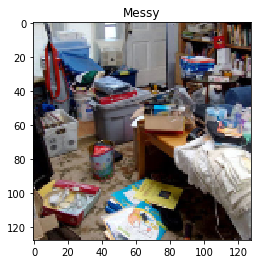

In [6]:
img = train_data[0]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Messy")
plt.imshow(img)

Showing Clean Picture

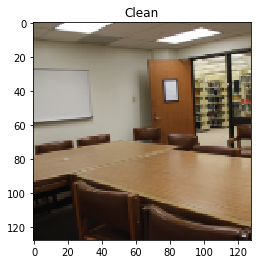

In [7]:
img = train_data[len(train_data)-1]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.title("Clean")
plt.imshow(img)

Merging training set and validation set

In [8]:
x_data = np.concatenate((train_data,val_data),axis=0)

Normalization

In [9]:
x_data = (x_data-np.min(x_data))/(np.max(x_data)-np.min(x_data))

Creating Labels (0 --> Messy & 1 --> Clean)

In [10]:
train_label_0 = np.zeros(len(os.listdir(train_messy_path)))
train_label_1 = np.ones(len(os.listdir(train_clean_path)))
Y_train = np.concatenate((train_label_0, train_label_1), axis=0)
val_label_0 = np.zeros(len(os.listdir(val_messy_path)))
val_label_1 = np.ones(len(os.listdir(val_messy_path)))
Y_val = np.concatenate((val_label_0, val_label_1), axis=0)

In [11]:
y_data=np.concatenate((Y_train,Y_val),axis=0).reshape(x_data.shape[0],1)
y_data.dtype

dtype('float64')

Creating new unbiased splits randomly

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=12)
num_of_train = x_train.shape[0]
num_of_test = x_test.shape[0]
print(x_train.shape,y_train.shape)
print(x_train[1])

(180, 128, 128, 3) (180, 1)
[[[ 0.43137255  0.76862745  0.99215686]
  [ 0.41176471  0.74901961  0.98431373]
  [ 0.37254902  0.71764706  0.96078431]
  ..., 
  [ 0.28235294  0.39607843  0.50196078]
  [ 0.09803922  0.13333333  0.20392157]
  [ 0.16470588  0.15686275  0.17254902]]

 [[ 0.39215686  0.66666667  0.96862745]
  [ 0.38823529  0.6627451   0.98039216]
  [ 0.34901961  0.65490196  0.97647059]
  ..., 
  [ 0.41960784  0.60392157  0.70588235]
  [ 0.10588235  0.12156863  0.19607843]
  [ 0.17254902  0.16470588  0.18039216]]

 [[ 0.31372549  0.56862745  0.89411765]
  [ 0.29411765  0.54901961  0.89411765]
  [ 0.25882353  0.50588235  0.81960784]
  ..., 
  [ 0.42745098  0.60784314  0.70980392]
  [ 0.08627451  0.11372549  0.17254902]
  [ 0.17647059  0.15294118  0.17254902]]

 ..., 
 [[ 0.22745098  0.37647059  0.50980392]
  [ 0.23529412  0.39607843  0.50588235]
  [ 0.20784314  0.37647059  0.49019608]
  ..., 
  [ 0.09803922  0.20392157  0.28627451]
  [ 0.07843137  0.19607843  0.29411765]
  [ 0.1

Reshaping image data and flattening

In [13]:
x_train = x_train.reshape(num_of_train,x_train.shape[1]*x_train.shape[2]*3).T
x_test = x_test.reshape(num_of_test,x_test.shape[1]*x_test.shape[2]*3).T
y_train=y_train.T
y_test=y_test.T
print("X train flatten",x_train.shape)
print("X test flatten",x_test.shape)
print(x_train[1])

X train flatten (49152, 180)
X test flatten (49152, 32)
[ 0.57647059  0.76862745  1.          0.75686275  0.57254902  0.93333333
  0.80392157  0.76862745  0.21568627  0.05490196  0.77254902  0.81176471
  0.27843137  0.97254902  0.58823529  0.0627451   0.69019608  0.16470588
  0.63529412  0.99215686  0.60392157  0.8627451   0.3254902   0.62352941
  0.22745098  0.59215686  0.1254902   0.72941176  0.66666667  0.41176471
  0.88235294  0.36470588  0.27058824  0.10980392  0.96470588  0.81568627
  0.45098039  0.73333333  0.21960784  0.8627451   0.85490196  0.41568627
  0.37647059  0.80784314  0.89019608  0.34509804  0.73333333  0.54901961
  0.42352941  0.41960784  0.31764706  0.7254902   0.71372549  0.96470588
  0.31764706  0.77647059  0.14117647  0.50980392  0.34117647  0.44313725
  0.60392157  0.57254902  0.87843137  0.86666667  0.7254902   0.90196078
  0.36078431  0.96470588  0.92156863  0.80392157  0.63529412  0.68627451
  0.81960784  0.8745098   0.56078431  0.77647059  0.54901961  0.3058

**Training using Logistic Regression**

In [14]:
train_set_x = x_train
train_set_y = y_train
test_set_x = x_test
test_set_y = y_test

Defining Required functions

In [15]:
def sigmoid(z):
    res = 1/(1+np.exp(-z))
    return res

In [16]:
def initialize(dim):
    w = np.zeros((dim,1))
    b = 0
    return w, b

In [17]:
def propagate(w, b, X, Y):
    m = X.shape[1]
    
    A = sigmoid(np.dot(w.T,X)+b)                                    
    cost = -1/m * np.sum(Y*np.log(A)+(1-Y)*np.log(1-A))  
    
    dz = 1/m * (A-Y)
    dw = np.dot(X,dz.T)
    db = np.sum(dz)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [18]:
#This function optimizes w and b by running a gradient descent algorithm
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):
    costs = []
    
    for i in range(num_iterations):
        
        
        grads, cost = propagate(w,b,X,Y)
        
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - np.dot(learning_rate,dw)
        b = b - learning_rate*db
        
        if i % 100 == 0:
            costs.append(cost)
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [19]:
def predict(w, b, X):
    
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    A = sigmoid(np.dot(w.T,X)+b)
    
    for i in range(A.shape[1]):
        
        if(A[0][i]<=0.5):
            Y_prediction[0][i]=0
        else:
            Y_prediction[0][i]=1
    
    
    assert(Y_prediction.shape == (1, m))
    
    return Y_prediction

In [20]:
def model(X_train, Y_train, X_test, Y_test, num_iterations = 1000, learning_rate = 0.5, print_cost = False):
    
    w, b = initialize(X_train.shape[0])

    parameters, grads, costs = optimize(w,b,X_train,Y_train,num_iterations,learning_rate,print_cost)
    
    w = parameters["w"]
    b = parameters["b"]
    
    Y_prediction_test = predict(w,b,X_test)
    Y_prediction_train = predict(w,b,X_train)

    
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    res = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return res

Training via calling model function

In [21]:
training = model(train_set_x, train_set_y, test_set_x, test_set_y, num_iterations = 2600, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 2.737055
Cost after iteration 200: 1.831870
Cost after iteration 300: 0.140214
Cost after iteration 400: 0.034892
Cost after iteration 500: 0.023237
Cost after iteration 600: 0.018629
Cost after iteration 700: 0.015975
Cost after iteration 800: 0.014182
Cost after iteration 900: 0.012862
Cost after iteration 1000: 0.011835
Cost after iteration 1100: 0.011006
Cost after iteration 1200: 0.010317
Cost after iteration 1300: 0.009731
Cost after iteration 1400: 0.009225
Cost after iteration 1500: 0.008782
Cost after iteration 1600: 0.008389
Cost after iteration 1700: 0.008037
Cost after iteration 1800: 0.007719
Cost after iteration 1900: 0.007430
Cost after iteration 2000: 0.007166
Cost after iteration 2100: 0.006923
Cost after iteration 2200: 0.006699
Cost after iteration 2300: 0.006491
Cost after iteration 2400: 0.006298
Cost after iteration 2500: 0.006117
train accuracy: 100.0 %
test accuracy: 59.375 %


Displaying some results

Predictions Are As Follows


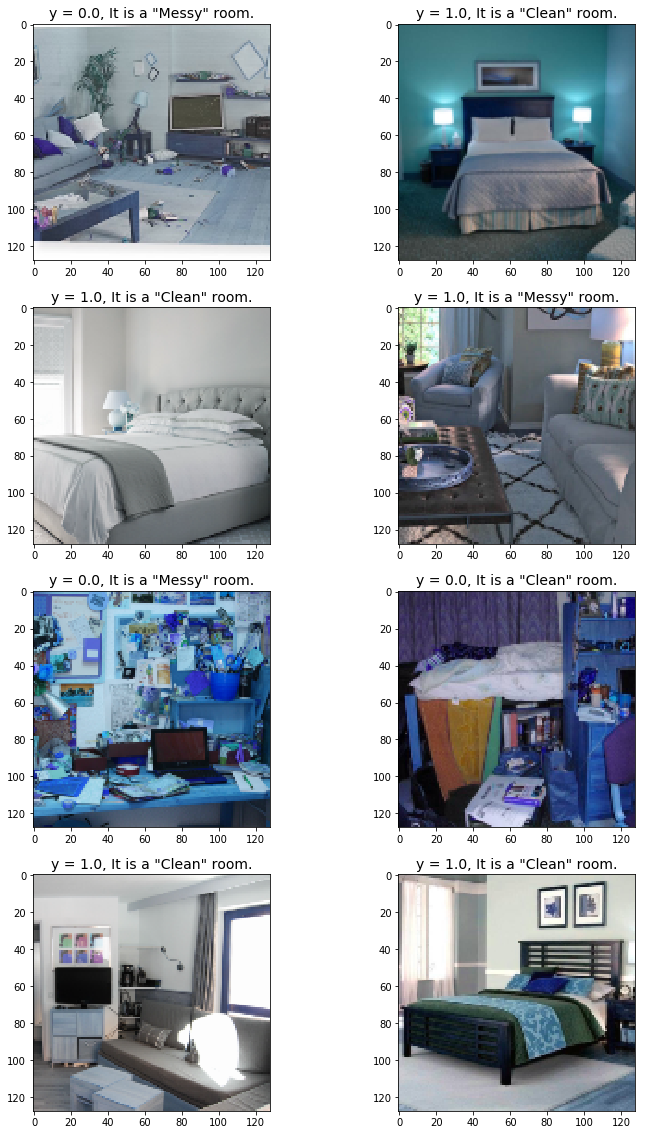

In [22]:
fig, axs= plt.subplots(4,2, figsize=[12,20])

index=0
row=4
column=2
for i in range(4):    
    for j in range(2):  
        result=training["Y_prediction_test"].astype(int)
        axs[i][j].imshow(test_set_x[:,index].reshape((IMG_SZ,IMG_SZ,3)))
        txt = "y = " + str(test_set_y[0,index]) + ", It is a \"" + Classes[result[0,index]]+  "\" room."
        axs[i][j].set_title(txt, fontsize = 14)
        index+=1
print("Predictions Are As Follows")        
plt.show()

# Thank You. This was the Implementation of Logistic Regression. To checkout the Logistic Regression(sklearn) and ConvNet models, go through the other notebook.